<h1 align = 'center'> Intel Nervana AI Academy University </h1>

<b> Logistic Regression <b/> is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

<h2 align = 'center'> Logistic Regression Assumptions </h2>

- Binary logistic regression requires the dependent variable to be binary.


- For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
  Only the meaningful variables should be included.
  

- The independent variables should be independent of each other. That is, the model should have little or no  multicollinearity.


- The independent variables are linearly related to the log odds.


- Logistic regression requires quite large sample sizes.


https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [1]:
#Import python libraries to handle activities

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
%matplotlib inline

<b> Difference between Linear Regression and Logistic Regression </b>

<b> Linear Regression </b> is used to establish a relationship between dependent and independent variable thus useful in the estimating of the resultant dependant variable in case of independent variable change while <b> Logistic Regression </b> is used to ascertain the probability of an event and the event is captured in binary format, which is 1 & 0

<b> Linear Regression </b> sample code activity using dependent and indepent variable.

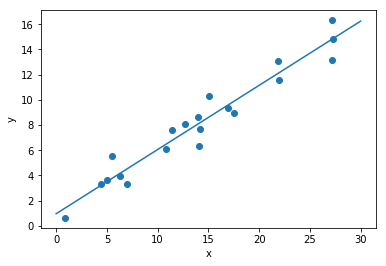

array([ 8.604328])

In [2]:
#simple basic example of the application of linear regression

a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

# create a linear regression classifier
clf = LinearRegression()
clf.fit(x[:, None], y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])

# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('tight')
plt.show()

#to get any value of y from x

clf.predict(15)


<b> Logistic Regression </b> sample code activity using the Immunotherapy dataset.

In [3]:
#loading the dataset to be used

f = open('Immunotherapy.csv','rU')
dataset = pd.read_csv(f)

In [4]:
dataset

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
5,1,15,5.00,3,3,84,7,1
6,1,35,9.75,2,2,8,6,1
7,2,28,7.50,4,1,9,2,1
8,2,19,6.00,2,1,225,8,1
9,2,32,12.00,6,3,35,5,0


In [5]:
table1=np.mean(dataset,0)
table2=np.std(dataset,0)

In [6]:
print table1
print table2

sex                     1.544444
age                    31.044444
Time                    7.230556
Number_of_Warts         6.144444
Type                    1.711111
Area                   95.700000
induration_diameter    14.333333
Result_of_Treatment     0.788889
dtype: float64
sex                      0.498021
age                     12.167270
Time                     3.080906
Number_of_Warts          4.188771
Type                     0.819816
Area                   135.853553
induration_diameter     17.121786
Result_of_Treatment      0.408097
dtype: float64


In [7]:
#dividing our dataset details into both inputdata and outputdata

inputData=dataset.iloc[:,:8]
outputData=dataset.iloc[:,7]

print list(inputData)

['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area', 'induration_diameter', 'Result_of_Treatment']


In [8]:
#needed dataset shape to be able to fit into the model 

print inputData.shape
print outputData.shape


(90, 8)
(90,)


In [9]:
logReg = LogisticRegression() #initialzing the model class to be used

logReg.fit(inputData, outputData) #fitting the data into the model
logReg.score(inputData, outputData)

1.0

In [10]:
####Model performance
####Classification rate 'by hand'
##Correctly classified

print np.mean(logReg.predict(inputData)==outputData)

##True positive
trueInput=dataset.ix[dataset['Result_of_Treatment'] == 1].iloc[:,:8]
trueOutput=dataset.ix[dataset['Result_of_Treatment'] == 1].iloc[:,7]
##True positive rate
print np.mean(logReg.predict(trueInput)==trueOutput)
##True negative
falseInput=dataset.ix[dataset['Result_of_Treatment'] == 0].iloc[:,:8]
falseOutput=dataset.ix[dataset['Result_of_Treatment'] == 0].iloc[:,7]
##True negative rate
print np.mean(logReg.predict(falseInput)==falseOutput)

1.0
1.0
1.0


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [11]:
#Confusion matrix with sklearn

#To evaluate the accuracy of a classification

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(logReg.predict(inputData),outputData)

array([[19,  0],
       [ 0, 71]])

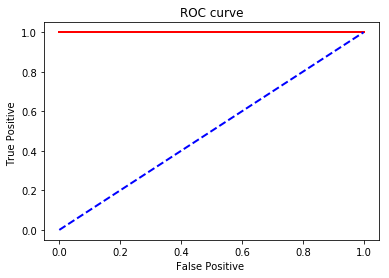

In [21]:
#Roc curve
#This implementation is only to the binary classification task

#TODO : how to use the roc more for proper classifying of the binary data 
fpr, tpr,_=roc_curve(logReg.predict(inputData),outputData,drop_intermediate=False)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

In [22]:
roc_auc_score(logReg.predict(inputData), outputData)

1.0

In [23]:
###Coefficient value
coef_DF = pd.DataFrame(data = {'Variable':list(inputData), 'value':(logReg.coef_[0])})

coef_DF_standardised = pd.DataFrame(data = {'Variable':list(inputData), 'value':(logReg.coef_[0])*np.std(inputData,axis=0)/np.std(outputData)})

In [24]:
coef_DF

,Variable,value
0,sex,0.116880
1,age,-0.014311
2,Time,-0.139211
3,Number_of_Warts,0.009205
4,Type,0.022130
5,Area,0.000203
6,induration_diameter,-0.002137
7,Result_of_Treatment,3.916184


In [25]:
coef_DF_standardised

,Variable,value
sex,sex,0.142635
age,age,-0.426677
Time,Time,-1.050965
Number_of_Warts,Number_of_Warts,0.094478
Type,Type,0.044457
Area,Area,0.067477
induration_diameter,induration_diameter,-0.089670
Result_of_Treatment,Result_of_Treatment,3.916184


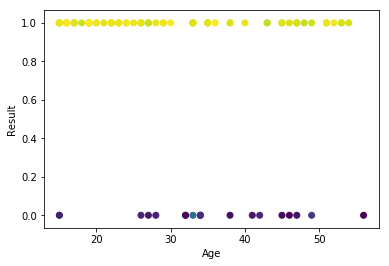

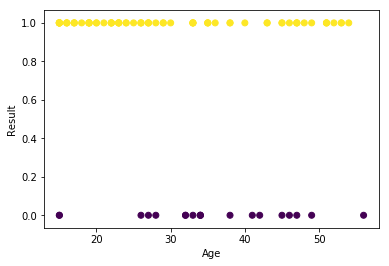

In [26]:
##Real vs predicted plot
##plotting Result 0f Treatment(.iloc[:,7]) against Age(.iloc[:,1]) in the dataset

plt.figure()
plt.scatter(inputData.iloc[:,1], inputData.iloc[:,7], c = logReg.predict_proba(inputData)[:,1], alpha = 1)
plt.xlabel('Age')
plt.ylabel('Result')
plt.show()

plt.figure()
plt.scatter(inputData.iloc[:,1], inputData.iloc[:,7], c = outputData, alpha = 1)
plt.xlabel('Age')
plt.ylabel('Result')
plt.show()